In [50]:
from keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [51]:
class FeatureExtractor:
    def __init__(self):
        base_model = InceptionV3(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

    def extract(self, img):
        img = img.resize((299, 299))
        img = img.convert('RGB')
        x = np.array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [52]:
image_dir = "fotodataset/foto_dataset/foto_dataset/"

feature_extractor = FeatureExtractor()

# List to store features and image paths
features = []
image_paths = []

# Extract features for each image
for img_path in sorted(Path(image_dir).glob('*')):
    print(img_path)
    img = Image.open(img_path)
    feature = feature_extractor.extract(img)
    features.append(feature)
    image_paths.append(str(img_path))

# Convert lists to numpy arrays
features = np.array(features)
image_paths = np.array(image_paths)

# Save features and image paths to files
np.save("fotodataset/features.npy", features)
np.save("fotodataset/image_paths.npy", image_paths)

96112376/96112376 [==============================] - 380s 4us/step
fotodataset\foto_dataset\foto_dataset\ACP0410-001.jpg
1/1 [==============================] - 4s 4s/step
fotodataset\foto_dataset\foto_dataset\ACP0410-002.jpg
1/1 [==============================] - 0s 403ms/step
fotodataset\foto_dataset\foto_dataset\ACP0410-003.jpg
1/1 [==============================] - 0s 423ms/step
fotodataset\foto_dataset\foto_dataset\ACP0410-004.jpg
1/1 [==============================] - 0s 404ms/step
fotodataset\foto_dataset\foto_dataset\ACP0410-005.jpg
1/1 [==============================] - 0s 391ms/step
fotodataset\foto_dataset\foto_dataset\ACP0410-006.jpg
1/1 [==============================] - 0s 401ms/step
fotodataset\foto_dataset\foto_dataset\ACP0410-007.jpg
1/1 [==============================] - 0s 396ms/step
fotodataset\foto_dataset\foto_dataset\ACP0410-008.jpg
1/1 [==============================] - 0s 398ms/step
fotodataset\foto_dataset\foto_dataset\ACP0410-009.jpg
1/1 [=====================

1/1 [==============================] - 5s 5s/step


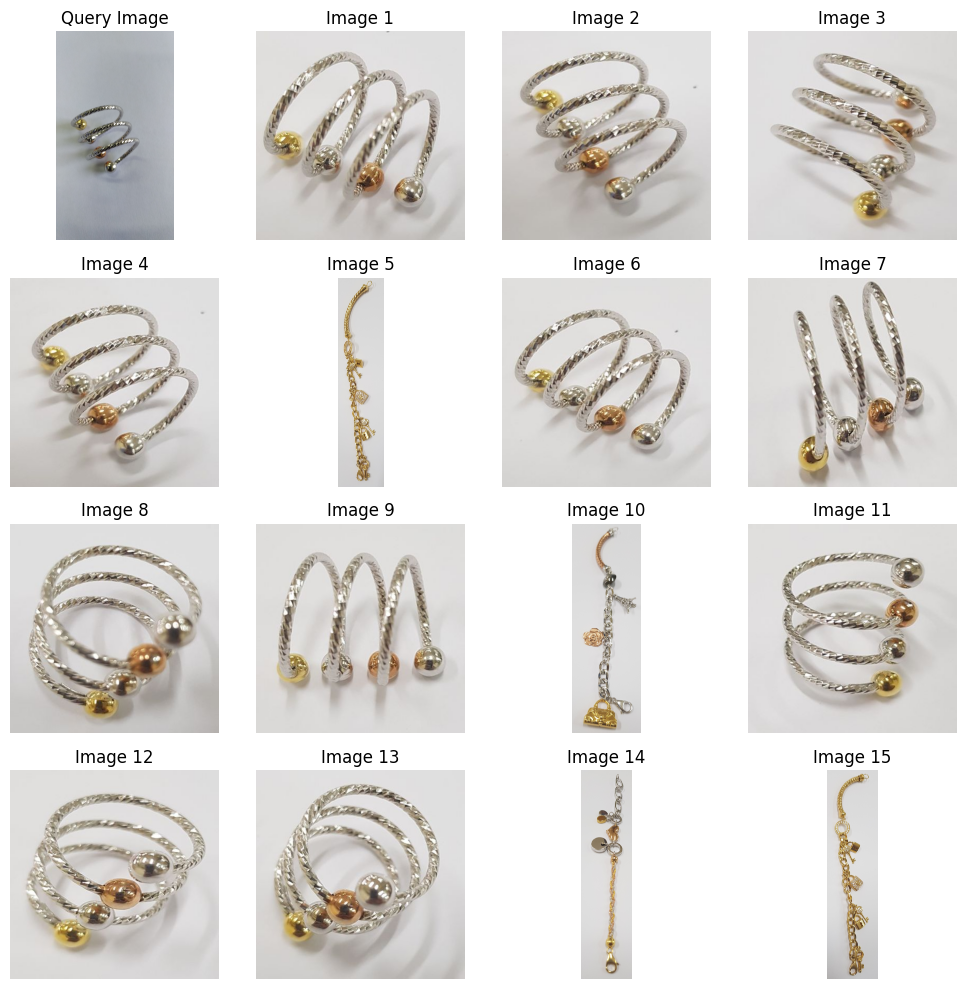

In [59]:
# Load saved features and image paths
features = np.load("fotodataset/features.npy")
image_paths = np.load("fotodataset/image_paths.npy")

query_image = Image.open("fotodataset/foto_test/foto_test/MSAM_17.jpg")

query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Get indices of the 15 most similar images
indices = np.argsort(dists)[:15]
retrieved_images = image_paths[indices]

# Specify the number of retrieved images
num_retrieved_images = 15

# Display the query image and retrieved images
num_rows = int(np.ceil((num_retrieved_images + 1) / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot retrieved images
for i, (image_path, ax) in enumerate(zip(retrieved_images, axes.flatten()[1:])):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

# Remove empty subplots if necessary
if (num_retrieved_images + 1) % 4 != 0:
    for j in range((num_retrieved_images + 1) % 4, 4):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 4s 4s/step


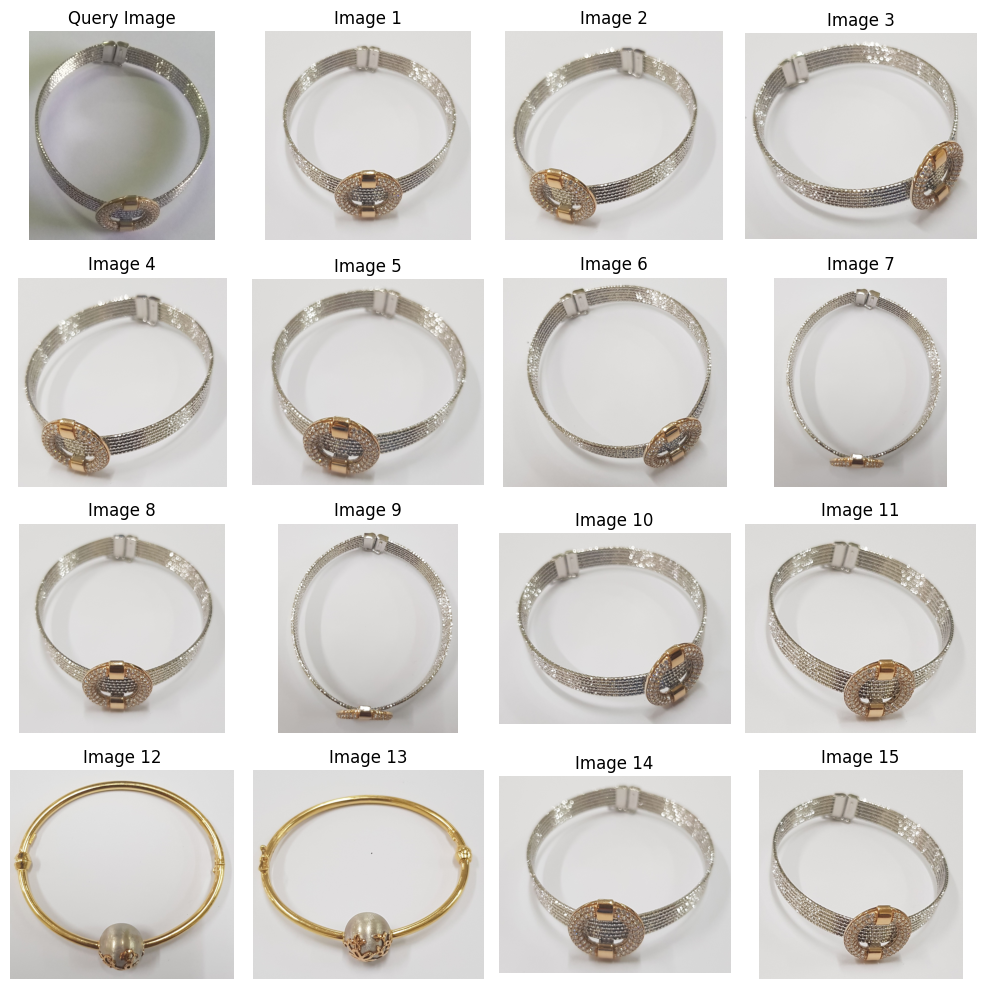

In [60]:
# Load saved features and image paths
features = np.load("fotodataset/features.npy")
image_paths = np.load("fotodataset/image_paths.npy")

query_image = Image.open("fotodataset/foto_test/foto_test/KAWH_13_rev01.jpg")

query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Get indices of the 15 most similar images
indices = np.argsort(dists)[:15]
retrieved_images = image_paths[indices]

# Specify the number of retrieved images
num_retrieved_images = 15

# Display the query image and retrieved images
num_rows = int(np.ceil((num_retrieved_images + 1) / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot retrieved images
for i, (image_path, ax) in enumerate(zip(retrieved_images, axes.flatten()[1:])):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

# Remove empty subplots if necessary
if (num_retrieved_images + 1) % 4 != 0:
    for j in range((num_retrieved_images + 1) % 4, 4):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 3s 3s/step


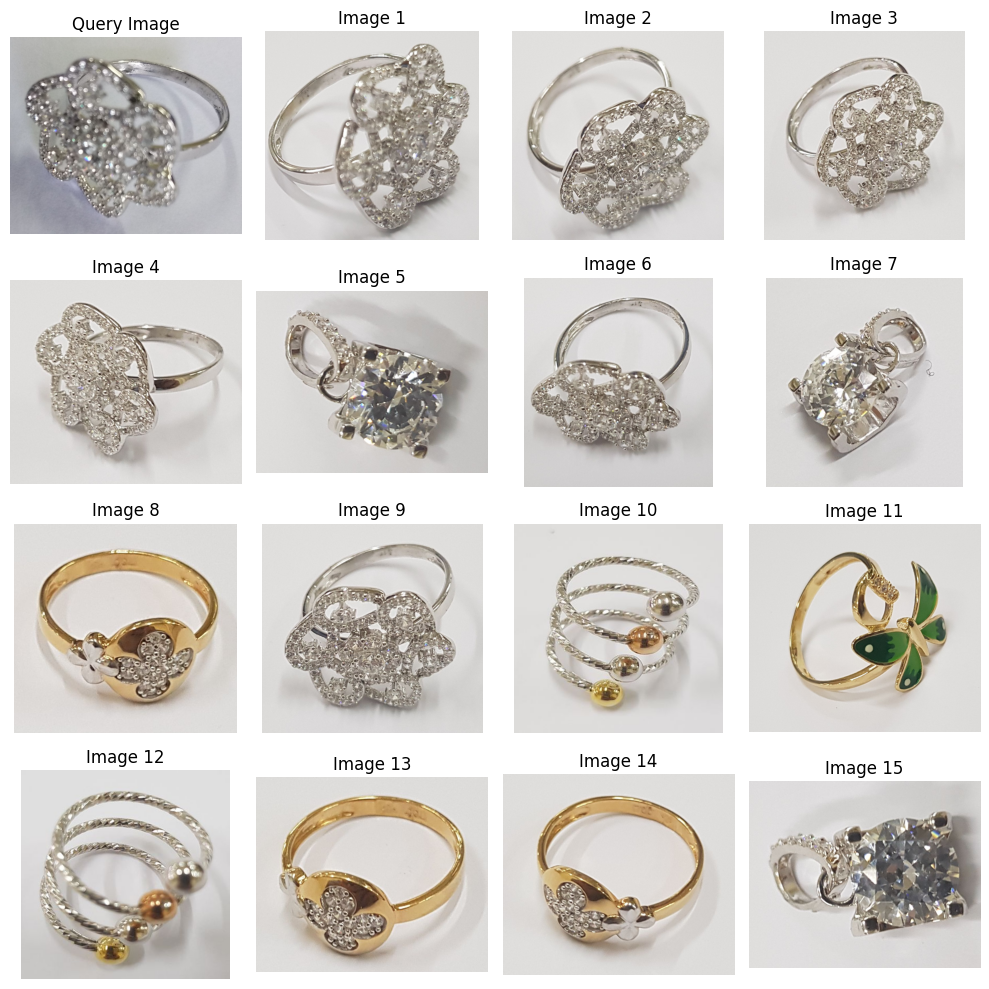

In [61]:
# Load saved features and image paths
features = np.load("fotodataset/features.npy")
image_paths = np.load("fotodataset/image_paths.npy")

query_image = Image.open("fotodataset/foto_test/foto_test/MSAM_19_rev01.jpg")

query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Get indices of the 15 most similar images
indices = np.argsort(dists)[:15]
retrieved_images = image_paths[indices]

# Specify the number of retrieved images
num_retrieved_images = 15

# Display the query image and retrieved images
num_rows = int(np.ceil((num_retrieved_images + 1) / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot retrieved images
for i, (image_path, ax) in enumerate(zip(retrieved_images, axes.flatten()[1:])):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

# Remove empty subplots if necessary
if (num_retrieved_images + 1) % 4 != 0:
    for j in range((num_retrieved_images + 1) % 4, 4):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 6s 6s/step


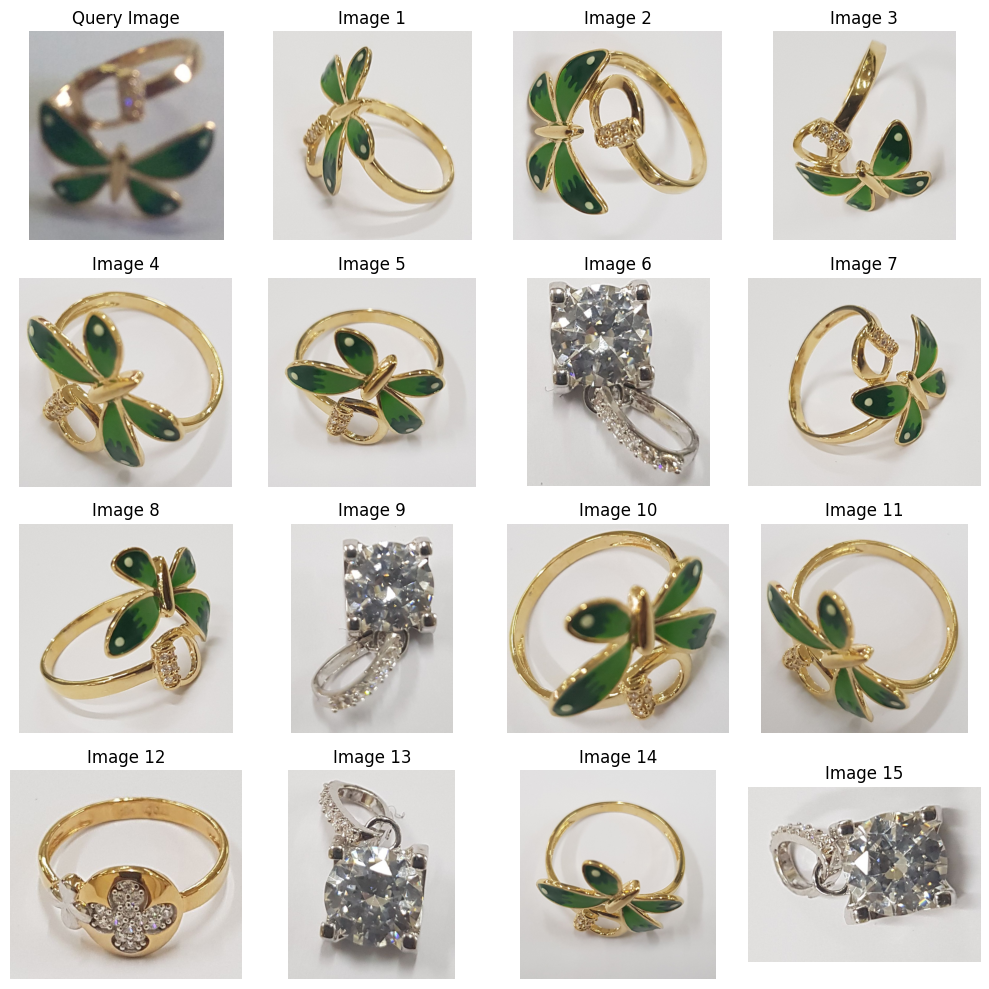

In [62]:
# Load saved features and image paths
features = np.load("fotodataset/features.npy")
image_paths = np.load("fotodataset/image_paths.npy")

query_image = Image.open("fotodataset/foto_test/foto_test/MBAK_12_rev01.jpg")

query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Get indices of the 15 most similar images
indices = np.argsort(dists)[:15]
retrieved_images = image_paths[indices]

# Specify the number of retrieved images
num_retrieved_images = 15

# Display the query image and retrieved images
num_rows = int(np.ceil((num_retrieved_images + 1) / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot retrieved images
for i, (image_path, ax) in enumerate(zip(retrieved_images, axes.flatten()[1:])):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

# Remove empty subplots if necessary
if (num_retrieved_images + 1) % 4 != 0:
    for j in range((num_retrieved_images + 1) % 4, 4):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 4s 4s/step


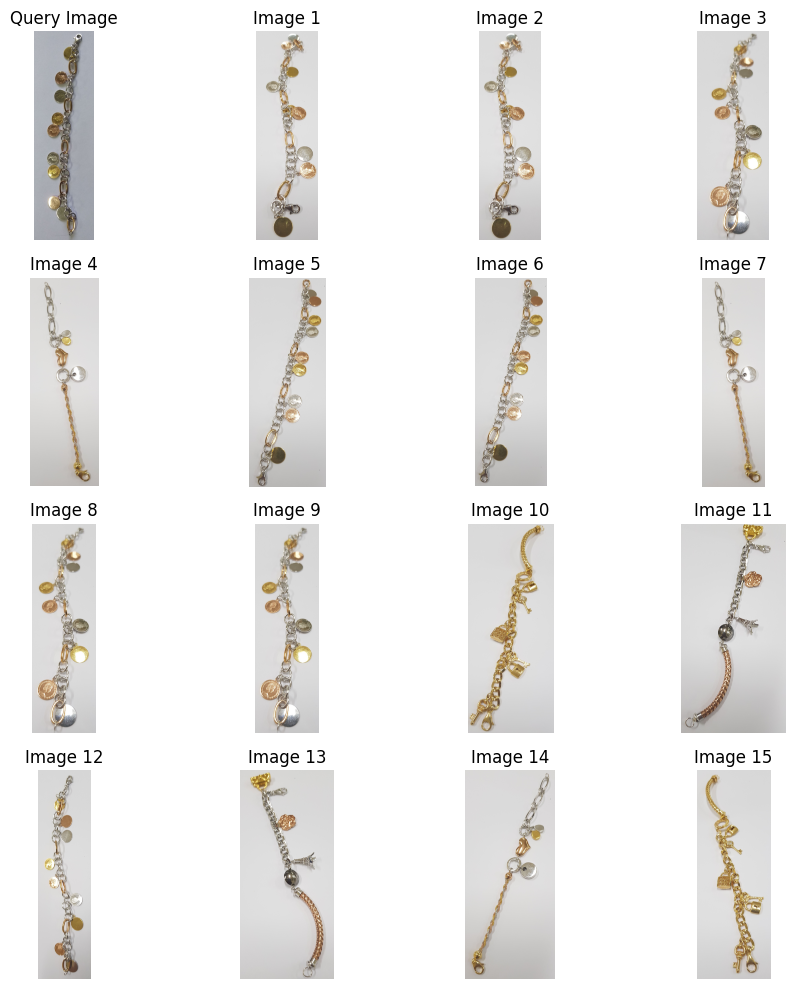

In [65]:
# Load saved features and image paths
features = np.load("fotodataset/features.npy")
image_paths = np.load("fotodataset/image_paths.npy")

query_image = Image.open("fotodataset/foto_test/foto_test/MSAM_24_rev01.jpg")

query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Get indices of the 15 most similar images
indices = np.argsort(dists)[:15]
retrieved_images = image_paths[indices]

# Specify the number of retrieved images
num_retrieved_images = 15

# Display the query image and retrieved images
num_rows = int(np.ceil((num_retrieved_images + 1) / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot retrieved images
for i, (image_path, ax) in enumerate(zip(retrieved_images, axes.flatten()[1:])):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

# Remove empty subplots if necessary
if (num_retrieved_images + 1) % 4 != 0:
    for j in range((num_retrieved_images + 1) % 4, 4):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 3s 3s/step


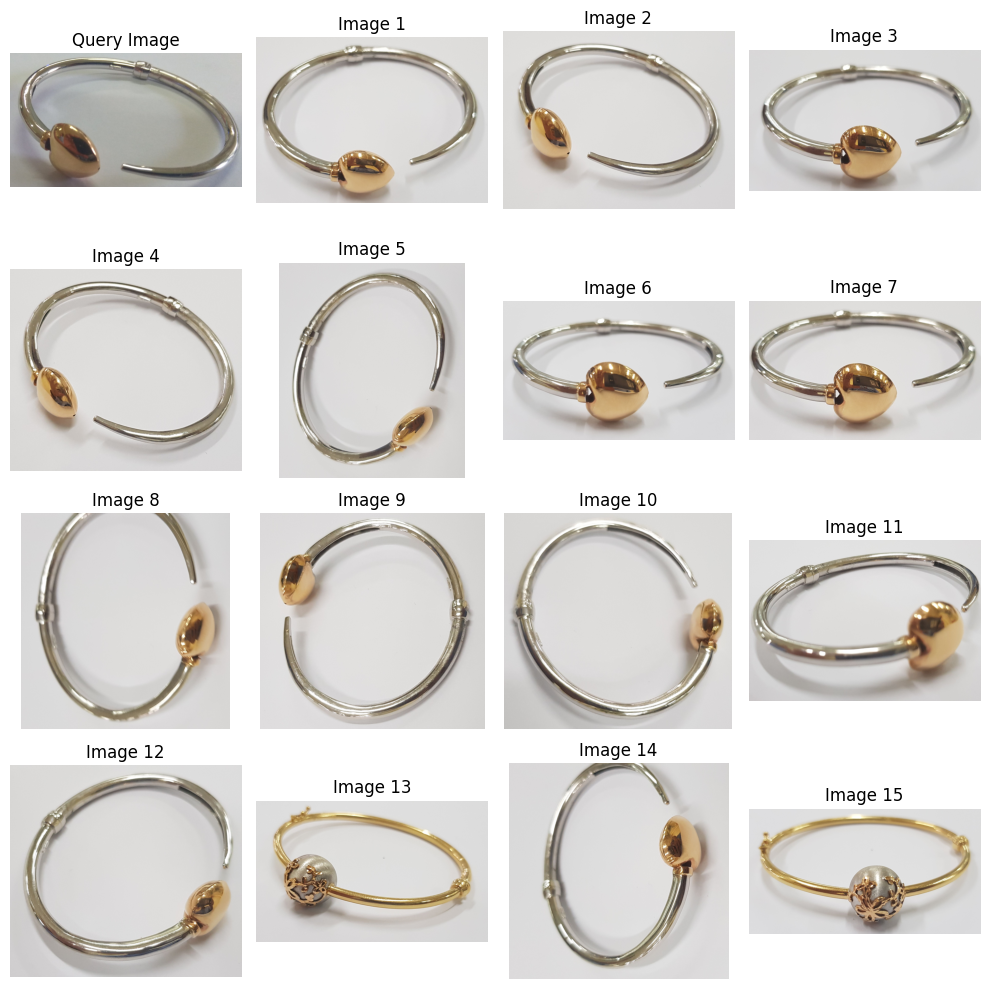

In [66]:
# Load saved features and image paths
features = np.load("fotodataset/features.npy")
image_paths = np.load("fotodataset/image_paths.npy")

query_image = Image.open("fotodataset/foto_test/foto_test/MBAK_19_rev01.jpg")

query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Get indices of the 15 most similar images
indices = np.argsort(dists)[:15]
retrieved_images = image_paths[indices]

# Specify the number of retrieved images
num_retrieved_images = 15

# Display the query image and retrieved images
num_rows = int(np.ceil((num_retrieved_images + 1) / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot retrieved images
for i, (image_path, ax) in enumerate(zip(retrieved_images, axes.flatten()[1:])):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

# Remove empty subplots if necessary
if (num_retrieved_images + 1) % 4 != 0:
    for j in range((num_retrieved_images + 1) % 4, 4):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()